In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore")

In [4]:
#D_* = Delinquency variables - minor crime
#S_* = Spend variables
#P_* = Payment variables
#B_* = Balance variables
#R_* = Risk variables

In [3]:
# X_train =pd.read_csv('X_train.csv')
# X_test1=pd.read_csv('X_test1.csv')
# X_test2=pd.read_csv('X_test2.csv')
# y_train=pd.read_csv('y_train.csv')
# y_test1=pd.read_csv('y_test1.csv')
# y_test2=pd.read_csv('y_test2.csv')

In [4]:
# X_train=X_train.drop(columns={'Unnamed: 0'})
# X_test1=X_test1.drop(columns={'Unnamed: 0'})
# X_test2=X_test2.drop(columns={'Unnamed: 0'})
# y_train=y_train.drop(columns={'Unnamed: 0'})
# y_test1=y_test1.drop(columns={'Unnamed: 0'})
# y_test2=y_test2.drop(columns={'Unnamed: 0'})

## Feature engineering

In [85]:
data=pd.read_csv('one_hot_encoded_data.csv')

data=data.drop(columns='Unnamed: 0')

data.info(max_cols=230)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105624 entries, 0 to 1105623
Data columns (total 225 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  1105624 non-null  object 
 1    target       1105624 non-null  int64  
 2    S_2          1105624 non-null  object 
 3    P_2          1096419 non-null  float64
 4    D_39         1105624 non-null  float64
 5    B_1          1105624 non-null  float64
 6    B_2          1105197 non-null  float64
 7    R_1          1105624 non-null  float64
 8    S_3          904750 non-null   float64
 9    D_41         1105197 non-null  float64
 10   B_3          1105197 non-null  float64
 11   D_42         157890 non-null   float64
 12   D_43         772680 non-null   float64
 13   D_44         1049936 non-null  float64
 14   B_4          1105624 non-null  float64
 15   D_45         1105197 non-null  float64
 16   B_5          1105624 non-null  float64
 17   R_2          1105624 non-

In [86]:
data=data.rename(columns={'S_2':'date'})

In [87]:
num_cols=list(data.select_dtypes(['float64']).columns)

In [88]:
df_num_agg = data.groupby(['customer_ID'])[num_cols].agg(['mean','sum','min','max','last','std'])
df_num_agg.columns = ['_'.join(x) for x in df_num_agg.columns]

In [89]:
df_num_agg=df_num_agg.reset_index()

In [90]:
df_num_agg.head()

,customer_ID,P_2_mean,P_2_sum,P_2_min,P_2_max,P_2_last,P_2_std,D_39_mean,D_39_sum,D_39_min,...,D_144_min,D_144_max,D_144_last,D_144_std,D_145_mean,D_145_sum,D_145_min,D_145_max,D_145_last,D_145_std
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,7.786598,0.567442,0.623392,0.621776,0.020108,0.048862,0.635204,0.000660,...,0.000492,0.009919,0.005560,0.002654,0.005236,0.068063,0.000029,0.009836,0.002983,0.003406
1,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.794131,10.323698,0.765181,0.824061,0.824061,0.019167,0.199325,2.591231,0.007104,...,0.001140,0.009998,0.006943,0.002677,0.004331,0.056304,0.000672,0.009156,0.001446,0.002926
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,1.005816,13.075607,1.000488,1.009762,1.009762,0.003309,0.353440,4.594719,0.000811,...,0.002050,0.009453,0.003350,0.002520,0.005734,0.074548,0.000675,0.009967,0.000675,0.003130
3,000333075fb8ec6d504539852eeeb762643562e701ac79...,0.673648,8.757419,0.632748,0.709686,0.703360,0.025694,0.347622,4.519089,0.000439,...,0.001271,0.009545,0.006742,0.002481,0.005578,0.072510,0.000903,0.009744,0.007675,0.003435
4,0004860c260168fcaad0734a1dfedb7ceb1a83aaac54e2...,0.260304,2.342740,0.074849,0.517967,0.074849,0.143876,0.905624,8.150619,0.000036,...,0.000269,0.009901,0.009901,0.002857,1.095867,9.862806,1.093257,1.099402,1.093480,0.002206


In [196]:
dict_ts={
'spend':22,
'Deliquency':96,
'Risk':28,
'Payment':3,
'Balance': 40,
}

In [197]:
cols_coun4t= pd.DataFrame(dict_ts.items(),columns=['Category','Number of values'])


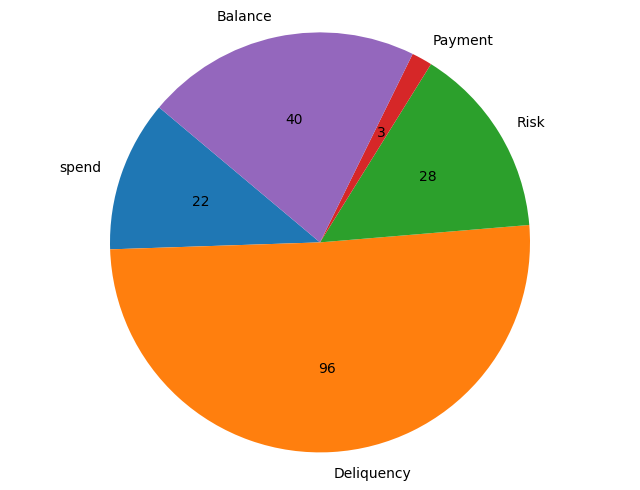

In [198]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cols_coun4t['Number of values'], labels=cols_coun4t['Category'], autopct=lambda p: '{:.0f}'.format(p * sum(cols_coun4t['Number of values']) / 100), startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [91]:
data['date'] = pd.to_datetime(data['date'])
end_date = data['date'].max()

# Date ranges
last_3_months = end_date - pd.DateOffset(months=3)
last_6_months = end_date - pd.DateOffset(months=6)
last_9_months = end_date - pd.DateOffset(months=9)
last_12_months = end_date - pd.DateOffset(months=12)

In [92]:
num_agg_fea3=data[data.date >= last_6_months].groupby(['customer_ID'])[num_cols].agg(['mean','sum','min','max','last'])
num_agg_fea3.columns= ['_6months_'.join(x) for x in num_agg_fea3.columns]
num_agg_fea3=num_agg_fea3.reset_index()

num_agg_fea5=data[data.date >= last_12_months].groupby(['customer_ID'])[num_cols].agg(['mean','sum','min','max','last'])
num_agg_fea5.columns= ['_12months_'.join(x) for x in num_agg_fea5.columns]
num_agg_fea5=num_agg_fea5.reset_index()

merged_numeric= num_agg_fea3.merge(num_agg_fea5,on=['customer_ID'])

num_agg_fea4=data[data.date >= last_3_months].groupby(['customer_ID'])[num_cols].agg(['mean','sum','min','max','last'])
num_agg_fea4.columns= ['_3months_'.join(x) for x in num_agg_fea4.columns]
num_agg_fea4=num_agg_fea4.reset_index()

num_agg_fea6=data[data.date >= last_9_months].groupby(['customer_ID'])[num_cols].agg(['mean','sum','min','max','last'])
num_agg_fea6.columns= ['_9months_'.join(x) for x in num_agg_fea6.columns]
num_agg_fea6=num_agg_fea6.reset_index()

merged_numeric_new=(merged_numeric.merge(num_agg_fea4,on=['customer_ID']).merge(num_agg_fea6,on=['customer_ID']))

In [93]:
cat_col_encoded = data[['customer_ID','date','D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM',
       'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'B_30_0.0',
       'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0',
       'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0',
       'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0',
       'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0',
       'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_66_0.0',
       'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0',
       'D_68_5.0', 'D_68_6.0']]

In [94]:
end_date = cat_col_encoded['date'].max() 
start_date = pd.to_datetime(end_date) - pd.DateOffset(months = 6) 
last_6_mon = cat_col_encoded[(pd.to_datetime(cat_col_encoded['date']) >= start_date) & 
                            (pd.to_datetime(cat_col_encoded['date']) <= pd.to_datetime(end_date))] 


cat_col_final = pd.DataFrame()
for col in last_6_mon.columns[2: 47]:
    new_col_name = col + '_rr_6'
    result = last_6_mon.groupby('customer_ID').agg({col: lambda x: (x == 1).mean()}) 
    result.rename(columns={col: new_col_name}, inplace=True) 
    cat_col_final = pd.concat([cat_col_final, result], axis=1)


In [95]:
cat_col_final=cat_col_final.reset_index()

In [96]:
#response rate for 12 months
end_date1 = cat_col_encoded['date'].max() 
start_date1 = pd.to_datetime(end_date1) - pd.DateOffset(months = 12) 
last_12_mon = cat_col_encoded[(pd.to_datetime(cat_col_encoded['date']) >= start_date1) & 
                            (pd.to_datetime(cat_col_encoded['date']) <= pd.to_datetime(end_date1))] 


cat_col_12 = pd.DataFrame()
for col in last_12_mon.columns[2: 47]:
    new_col_name1 = col + '_rr_12'
    result1 = last_12_mon.groupby('customer_ID').agg({col: lambda x: (x == 1).mean()}) 
    result1.rename(columns={col: new_col_name1}, inplace=True) 
    cat_col_12 = pd.concat([cat_col_12, result1], axis=1)


In [97]:
cat_col_12=cat_col_12.reset_index()

In [98]:
#categorical column  merged
cat_merged=cat_col_final.merge(cat_col_12,on=['customer_ID'])

In [99]:
engin_data=merged_numeric_new.merge(cat_merged,on=['customer_ID'])

In [100]:
#adding binary variable as well
v1=data[['customer_ID','B_31']].drop_duplicates().reset_index(drop=True)

engin_data=engin_data.merge(v1, on = ['customer_ID'],how='left')

#adding target variable
engin_data=engin_data.merge(data[['customer_ID','target']].drop_duplicates().reset_index(drop=True),on='customer_ID')


In [101]:
engin_data.head()

,customer_ID,P_2_6months_mean,P_2_6months_sum,P_2_6months_min,P_2_6months_max,P_2_6months_last,D_39_6months_mean,D_39_6months_sum,D_39_6months_min,D_39_6months_max,...,D_66_1.0_rr_12,D_68_0.0_rr_12,D_68_1.0_rr_12,D_68_2.0_rr_12,D_68_3.0_rr_12,D_68_4.0_rr_12,D_68_5.0_rr_12,D_68_6.0_rr_12,B_31,target
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.617281,3.703688,0.606677,0.623392,0.621776,0.009111,0.054665,0.001083,0.033809,...,0.000000,0.0,0.0,0.153846,0.692308,0.000000,0.0,0.153846,1,0
1,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.811217,4.867302,0.798001,0.824061,0.824061,0.304909,1.829453,0.007669,0.711983,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1,0
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,1.006935,6.041612,1.004538,1.009762,1.009762,0.264581,1.587485,0.000811,0.472033,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,1,0
3,000333075fb8ec6d504539852eeeb762643562e701ac79...,0.694786,4.168717,0.663252,0.709686,0.703360,0.309116,1.854696,0.006179,0.649038,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,1,1
4,0004860c260168fcaad0734a1dfedb7ceb1a83aaac54e2...,0.177186,1.063115,0.074849,0.209219,0.074849,1.307651,7.845908,0.419504,2.588318,...,0.777778,0.0,0.0,0.333333,0.333333,0.111111,0.0,0.000000,1,1


In [102]:
#misses the merging with df_num_agg
engin_data= engin_data.merge(df_num_agg, on ='customer_ID')

In [104]:
engin_data.shape

(93993, 4669)

In [199]:
dict_two= { 'spend':sum(col.startswith('S') for col in engin_data.columns),
'Deliquency': sum(col.startswith('D') for col in engin_data.columns),
'Risk': sum(col.startswith('R') for col in engin_data.columns),
'Payment': sum(col.startswith('P') for col in engin_data.columns),
'Balance': sum(col.startswith('B') for col in engin_data.columns)
 
}

In [200]:
cols_count2=pd.DataFrame(dict_two.items(),columns=['prefix','count_after'])

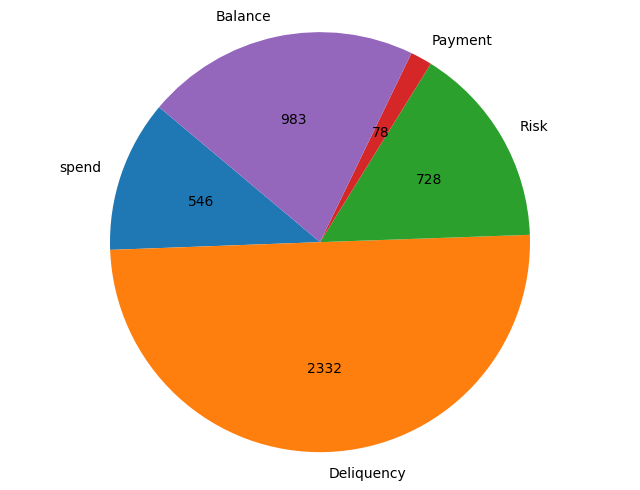

In [201]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cols_count2['count_after'], labels=cols_count2['prefix'], autopct=lambda p: '{:.0f}'.format(p * sum(cols_count2['count_after']) / 100), startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [70]:
engin_data.to_csv('feature_engineered_data.csv',index=False)

## Feature selection

In [105]:
chunksize = 10000

for_selection_data = pd.DataFrame()
for chunk in pd.read_csv("feature_engineered_data.csv", chunksize=chunksize):
    for_selection_data = pd.concat([for_selection_data, chunk])
    

In [106]:
#for_selection_data=for_selection_data.drop(columns=['Unnamed: 0'])

In [107]:
for_selection_data.shape

(93993, 4669)

In [108]:
for_selection_data.head()

,customer_ID,P_2_6months_mean,P_2_6months_sum,P_2_6months_min,P_2_6months_max,P_2_6months_last,D_39_6months_mean,D_39_6months_sum,D_39_6months_min,D_39_6months_max,...,D_144_min,D_144_max,D_144_last,D_144_std,D_145_mean,D_145_sum,D_145_min,D_145_max,D_145_last,D_145_std
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.617281,3.703688,0.606677,0.623392,0.621776,0.009111,0.054665,0.001083,0.033809,...,0.000492,0.009919,0.005560,0.002654,0.005236,0.068063,0.000029,0.009836,0.002983,0.003406
1,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.811217,4.867302,0.798001,0.824061,0.824061,0.304909,1.829453,0.007669,0.711983,...,0.001140,0.009998,0.006943,0.002677,0.004331,0.056304,0.000672,0.009156,0.001446,0.002926
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,1.006935,6.041612,1.004538,1.009762,1.009762,0.264581,1.587485,0.000811,0.472033,...,0.002050,0.009453,0.003350,0.002520,0.005734,0.074548,0.000675,0.009967,0.000675,0.003130
3,000333075fb8ec6d504539852eeeb762643562e701ac79...,0.694786,4.168717,0.663252,0.709686,0.703360,0.309116,1.854696,0.006179,0.649038,...,0.001271,0.009545,0.006742,0.002481,0.005578,0.072510,0.000903,0.009744,0.007675,0.003435
4,0004860c260168fcaad0734a1dfedb7ceb1a83aaac54e2...,0.177186,1.063115,0.074849,0.209219,0.074849,1.307651,7.845908,0.419504,2.588318,...,0.000269,0.009901,0.009901,0.002857,1.095867,9.862806,1.093257,1.099402,1.093480,0.002206


In [109]:
X = for_selection_data.drop(columns=['target','customer_ID'], axis=1)
y = for_selection_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [110]:
print("X train shape:",X_train.shape)
print("X test1 shape:",X_test1.shape)
print("X test2 shape:",X_test2.shape)

X train shape: (65795, 4667)
X test1 shape: (14099, 4667)
X test2 shape: (14099, 4667)


In [111]:
#Train XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
#feature imporatance
feature_importance = xgb.feature_importances_

In [113]:
features_table=pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

In [114]:
features_table[features_table.Importance>0.005].reset_index(drop=True).to_csv('imp_features_basic_xgboost.csv')

In [115]:
features_table[features_table.Importance>0.005]

,Feature,Importance
4,P_2_6months_last,0.006606
14,B_1_6months_last,0.013577
884,P_2_12months_last,0.029268
1760,P_2_3months_mean,0.042639
1764,P_2_3months_last,0.159082
1783,R_1_3months_max,0.009165
2644,P_2_9months_last,0.079135
2660,R_1_9months_mean,0.006419
3615,P_2_last,0.010296
3661,D_42_min,0.005516


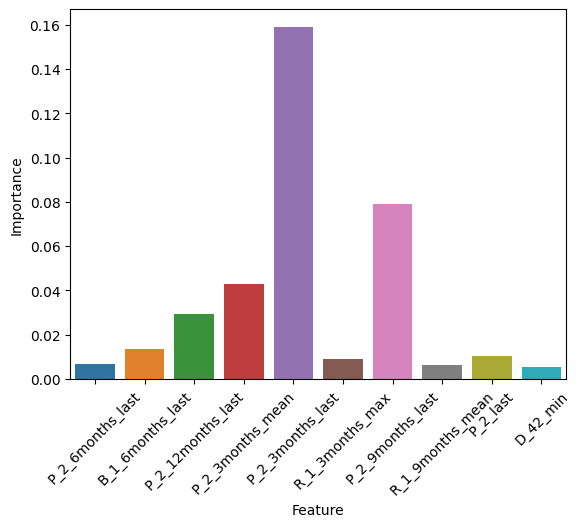

In [116]:
sns.barplot(x=features_table[features_table.Importance>0.005].Feature,y=features_table[features_table.Importance>0.005].Importance,
               hue=features_table[features_table.Importance>0.005].Feature)
plt.xticks(rotation=45)
plt.show()

In [117]:
#Important Features
selected_features = X.columns[feature_importance > 0.005]  

In [118]:
selected_features

Index(['P_2_6months_last', 'B_1_6months_last', 'P_2_12months_last',
       'P_2_3months_mean', 'P_2_3months_last', 'R_1_3months_max',
       'P_2_9months_last', 'R_1_9months_mean', 'P_2_last', 'D_42_min'],
      dtype='object')

In [119]:
#Train XGBoost Model
xgb = xgb_model = XGBClassifier(
    n_estimators=300,          # Number of trees (boosting rounds)
    learning_rate=0.5,         # Learning rate
    max_depth=4,               # Maximum depth of trees
    subsample=0.5,             # Subsample ratio of the training instances (fraction of observations to build each tree)
    colsample_bytree=0.5,      # Subsample ratio of columns when constructing each tree (fraction of features to build each tree)
    scale_pos_weight=5,        # Weight of positive examples (default observations)
    random_state=42            # Random seed for reproducibility
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [120]:

feature_importance1 = xgb.feature_importances_

In [121]:
#Important Features
selected_features1 = X.columns[feature_importance1 > 0.005]  

In [122]:
features_table2=pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance1})

In [123]:
features_table2[features_table2.Importance>0.005].reset_index(drop=True).to_csv('imp_features_modified_xgboost.csv')

In [124]:
selected_features1

Index(['P_2_3months_min', 'P_2_3months_last', 'B_1_3months_last',
       'B_2_9months_last', 'D_48_9months_last', 'P_2_last', 'D_42_min'],
      dtype='object')

### final slected features

In [125]:
#(set(list(selected_features)+list(selected_features1)))

In [126]:
Selected_Features=pd.concat([features_table[features_table.Importance>0.005],
           features_table2[features_table2.Importance>0.005]],axis=0).drop_duplicates(subset=['Feature']).sort_values(by=['Importance'],ascending=False).reset_index(drop=True)


In [213]:
for_selection_data[['B_1_3months_last','P_2_last','B_2_9months_last','D_48_9months_last','P_2_12months_last']].describe().T

,count,mean,std,min,25%,50%,75%,max
B_1_3months_last,93993.0,0.141830,0.233688,-2.533303e-01,0.009177,0.034446,0.159012,1.324045
P_2_last,93511.0,0.627482,0.272498,-3.923312e-01,0.438341,0.673941,0.859454,1.009993
B_2_9months_last,93985.0,0.584297,0.413606,2.024839e-07,0.068089,0.813087,1.001844,1.010000
D_48_9months_last,87429.0,0.399006,0.347376,-9.587842e-03,0.073673,0.295036,0.727052,3.895803
P_2_12months_last,93505.0,0.627481,0.272504,-3.923312e-01,0.438337,0.673941,0.859462,1.009993


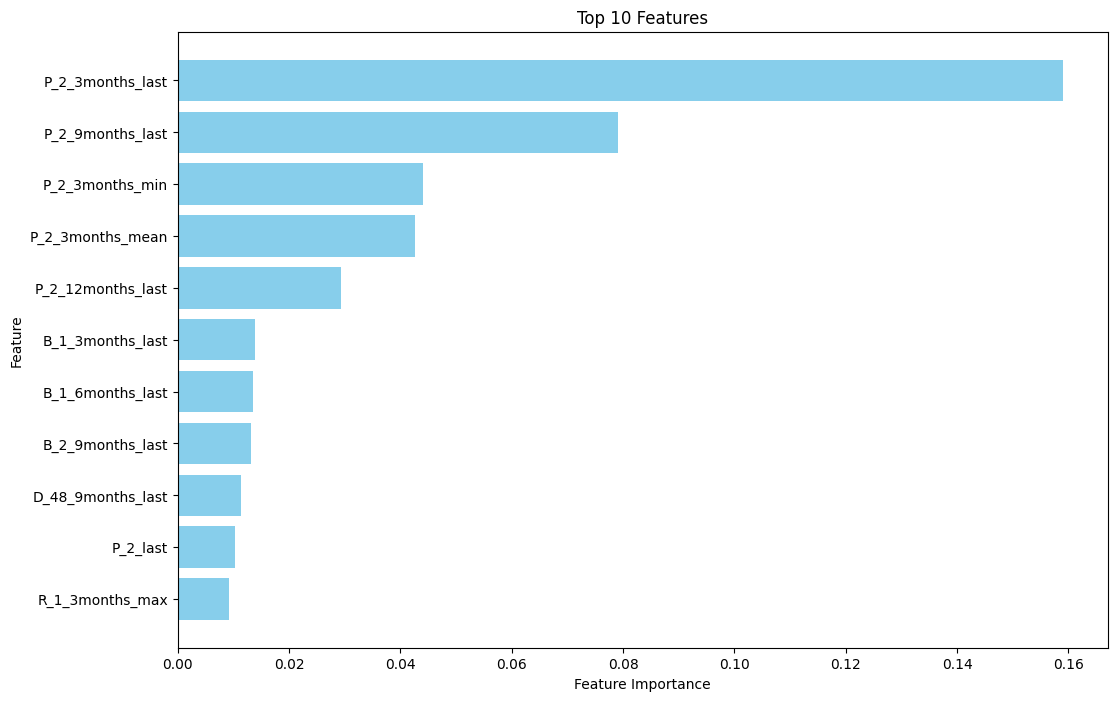

In [127]:

# Select the top 20 features
top_20_features = Selected_Features.head(11)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()  # Reverse the order to display the most important at the top
plt.show()


In [208]:
Selected_Features.columns

Index(['Feature', 'Importance'], dtype='object')

## XGBOOST

In [128]:
for_selection_data

,customer_ID,P_2_6months_mean,P_2_6months_sum,P_2_6months_min,P_2_6months_max,P_2_6months_last,D_39_6months_mean,D_39_6months_sum,D_39_6months_min,D_39_6months_max,...,D_144_min,D_144_max,D_144_last,D_144_std,D_145_mean,D_145_sum,D_145_min,D_145_max,D_145_last,D_145_std
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.617281,3.703688,0.606677,0.623392,0.621776,0.009111,0.054665,0.001083,0.033809,...,0.000492,0.009919,0.005560,0.002654,0.005236,0.068063,0.000029,0.009836,0.002983,0.003406
1,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.811217,4.867302,0.798001,0.824061,0.824061,0.304909,1.829453,0.007669,0.711983,...,0.001140,0.009998,0.006943,0.002677,0.004331,0.056304,0.000672,0.009156,0.001446,0.002926
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,1.006935,6.041612,1.004538,1.009762,1.009762,0.264581,1.587485,0.000811,0.472033,...,0.002050,0.009453,0.003350,0.002520,0.005734,0.074548,0.000675,0.009967,0.000675,0.003130
3,000333075fb8ec6d504539852eeeb762643562e701ac79...,0.694786,4.168717,0.663252,0.709686,0.703360,0.309116,1.854696,0.006179,0.649038,...,0.001271,0.009545,0.006742,0.002481,0.005578,0.072510,0.000903,0.009744,0.007675,0.003435
4,0004860c260168fcaad0734a1dfedb7ceb1a83aaac54e2...,0.177186,1.063115,0.074849,0.209219,0.074849,1.307651,7.845908,0.419504,2.588318,...,0.000269,0.009901,0.009901,0.002857,1.095867,9.862806,1.093257,1.099402,1.093480,0.002206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93988,fffb8cb2a4375ee042827ce1e880268ca33b1091bb6811...,0.850776,5.104654,0.828716,0.882631,0.842134,0.013551,0.081307,0.001300,0.032757,...,0.001083,0.009361,0.008266,0.002639,0.004427,0.057547,0.001333,0.009609,0.004321,0.002720
93989,fffba0c4fec239273a7758e4a49dc42463922f953d2aa5...,0.497708,2.986245,0.451287,0.529081,0.451287,0.288261,1.729565,0.033685,0.564500,...,0.002313,0.009929,0.005174,0.002447,0.004841,0.062931,0.000159,0.009602,0.003968,0.003114
93990,fffcb20b7dc596199586ae6bea874fa1c8056d41d9c558...,0.754090,4.524541,0.751972,0.756888,0.751972,0.005203,0.031217,0.001538,0.009862,...,0.001094,0.009899,0.009663,0.003205,0.004811,0.062547,0.000592,0.009219,0.003189,0.003026
93991,fffe0f90c85547c9a30d49afdc0f501523e55eec15399d...,-0.077272,-0.463630,-0.157739,-0.020809,-0.024473,0.137966,0.827796,0.033277,0.652109,...,0.000173,0.009729,0.009539,0.003416,0.004101,0.053308,0.001620,0.009306,0.003612,0.002084


In [129]:
#only chosen features

# List of columns to include in df3
columns_to_include = ["customer_ID", "target"] + list(Selected_Features["Feature"])

# Create df3 by selecting the specified columns from df2
df3 = for_selection_data[columns_to_include]


In [130]:
df3.head()

,customer_ID,target,P_2_3months_last,P_2_9months_last,P_2_3months_min,P_2_3months_mean,P_2_12months_last,B_1_3months_last,B_1_6months_last,B_2_9months_last,D_48_9months_last,P_2_last,R_1_3months_max,P_2_6months_last,R_1_9months_mean,D_42_min
0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.621776,0.621776,0.614661,0.619943,0.621776,0.012564,0.012564,1.006183,0.013057,0.621776,0.009648,0.621776,0.005753,NaN
1,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0,0.824061,0.824061,0.822467,0.823400,0.824061,0.007853,0.007853,1.001713,NaN,0.824061,0.007548,0.824061,0.005507,NaN
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,0,1.009762,1.009762,1.005478,1.007741,1.009762,-0.000886,-0.000886,1.006692,0.110239,1.009762,0.009019,1.009762,0.005585,NaN
3,000333075fb8ec6d504539852eeeb762643562e701ac79...,1,0.703360,0.703360,0.699399,0.704148,0.703360,0.030412,0.030412,1.002236,NaN,0.703360,0.008567,0.703360,0.005753,NaN
4,0004860c260168fcaad0734a1dfedb7ceb1a83aaac54e2...,1,0.074849,0.074849,0.074849,0.153500,0.074849,0.107940,0.107940,0.054011,0.978657,0.074849,0.508277,0.074849,0.254426,0.301195


In [209]:
df3.columns

Index(['customer_ID', 'target', 'P_2_3months_last', 'P_2_9months_last',
       'P_2_3months_min', 'P_2_3months_mean', 'P_2_12months_last',
       'B_1_3months_last', 'B_1_6months_last', 'B_2_9months_last',
       'D_48_9months_last', 'P_2_last', 'R_1_3months_max', 'P_2_6months_last',
       'R_1_9months_mean', 'D_42_min'],
      dtype='object')

In [ ]:
['P_2_3months_last', 'P_2_9months_last',
       'P_2_3months_min', 'P_2_3months_mean', 'P_2_12months_last',
       'B_1_3months_last', 'B_1_6months_last', 'B_2_9months_last',
       'D_48_9months_last', 'P_2_last', 'R_1_3months_max', 'P_2_6months_last',
       'R_1_9months_mean', 'D_42_min']

In [131]:

X = df3.drop(['customer_ID','target'], axis=1)
y = df3['target']

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)



In [132]:

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Trees', 'LR', 'Subsample', '% Features', 'Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 300],        # Number of trees
    'learning_rate': [0.01, 0.1],           # Learning rate
    'subsample': [0.5, 0.8],                # Percentage of observations used in each tree
    'colsample_bytree': [0.5, 1.0],         # Percentage of features used in each tree
    'scale_pos_weight': [1, 5, 10]          # Weight of default observations
}

XGB_class=XGBClassifier()

# Perform grid search using the parameter grid
grid_search = GridSearchCV(
    estimator=XGB_class,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)


# Fit the grid search to your data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc', verbose=1)

In [133]:

# Extract the best parameters and corresponding scores
best_params = grid_search.best_params_
best_score_train = grid_search.best_score_
best_score_test_1 = grid_search.score(X_test1, y_test1)
best_score_test_2 = grid_search.score(X_test2, y_test2)

temp={
    'Trees': best_params['n_estimators'],
    'LR': best_params['learning_rate'],
    'Subsample': best_params['subsample'],
    '% Features': best_params['colsample_bytree'],
    'Weight of Default': best_params['scale_pos_weight'],
    'AUC Train': best_score_train,
    'AUC Test 1': best_score_test_1,
    'AUC Test 2': best_score_test_2
}
print(temp)
temp_df = pd.DataFrame(temp,index=range(len(temp)))
results_df= pd.concat([results_df,temp_df],axis=0)


{'Trees': 100, 'LR': 0.1, 'Subsample': 0.8, '% Features': 0.5, 'Weight of Default': 1, 'AUC Train': 0.9448297930122976, 'AUC Test 1': 0.946124139320902, 'AUC Test 2': 0.9450119708795482}


In [134]:
results_df

,Trees,LR,Subsample,% Features,Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
1,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
2,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
3,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
4,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
5,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
6,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012
7,100,0.1,0.8,0.5,1,0.94483,0.946124,0.945012


In [135]:
from sklearn.metrics import roc_auc_score
import pandas as pd

In [136]:



# Create an empty DataFrame
results_df = pd.DataFrame(columns=['# Trees', 'LR', 'Subsample %', 'Features', '% Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search.cv_results_['params']):
    
    # Fit model with current parameters
    XGB_class.set_params(**params)
    XGB_class.fit(X_train, y_train)
    
    # Predict probabilities for each set
    train_pred = XGB_class.predict_proba(X_train)[:, 1]
    test1_pred = XGB_class.predict_proba(X_test1)[:, 1]
    test2_pred = XGB_class.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        '# Trees': [params['n_estimators']],
        'LR': [params['learning_rate']],
        'Subsample %': [f'{params["subsample"] * 100}%'],
        'Features': [f'{params["colsample_bytree"] * 100}%'],
        '% Weight of Default': [params['scale_pos_weight']],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('grid_search_XGBoost.csv', index=False)



In [137]:
results_df

,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.945810,0.943926,0.943157
1,50,0.01,80.0%,50.0%,1,0.946041,0.943897,0.942998
2,50,0.01,50.0%,50.0%,5,0.944928,0.943131,0.942602
3,50,0.01,80.0%,50.0%,5,0.945008,0.943017,0.942592
4,50,0.01,50.0%,50.0%,10,0.944706,0.942921,0.942435
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,0.972623,0.945961,0.944229
68,300,0.10,50.0%,100.0%,5,0.970055,0.944843,0.942889
69,300,0.10,80.0%,100.0%,5,0.971912,0.945861,0.943836
70,300,0.10,50.0%,100.0%,10,0.968745,0.944887,0.943656


In [138]:
import numpy as np

AUC_AVG = (results_df['AUC Train'] + results_df['AUC Test 1'] + results_df['AUC Test 2']) / 3
AUC_SD = []
for i in range(72):
    AUC_SD.append(np.std([results_df['AUC Train'][i], results_df['AUC Test 1'][i], results_df['AUC Test 2'][i]]))

results_df['AUC AVG'] = AUC_AVG
results_df['AUC SD'] = AUC_SD


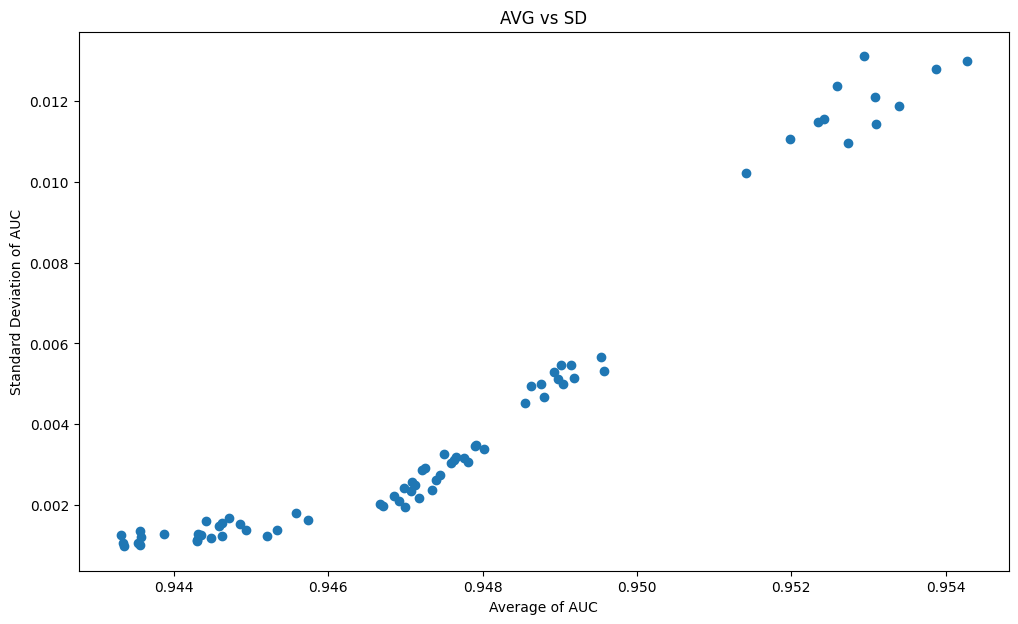

In [139]:
plt.figure(figsize=(12, 7))
plt.scatter(results_df['AUC AVG'], results_df['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'AVG vs SD'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


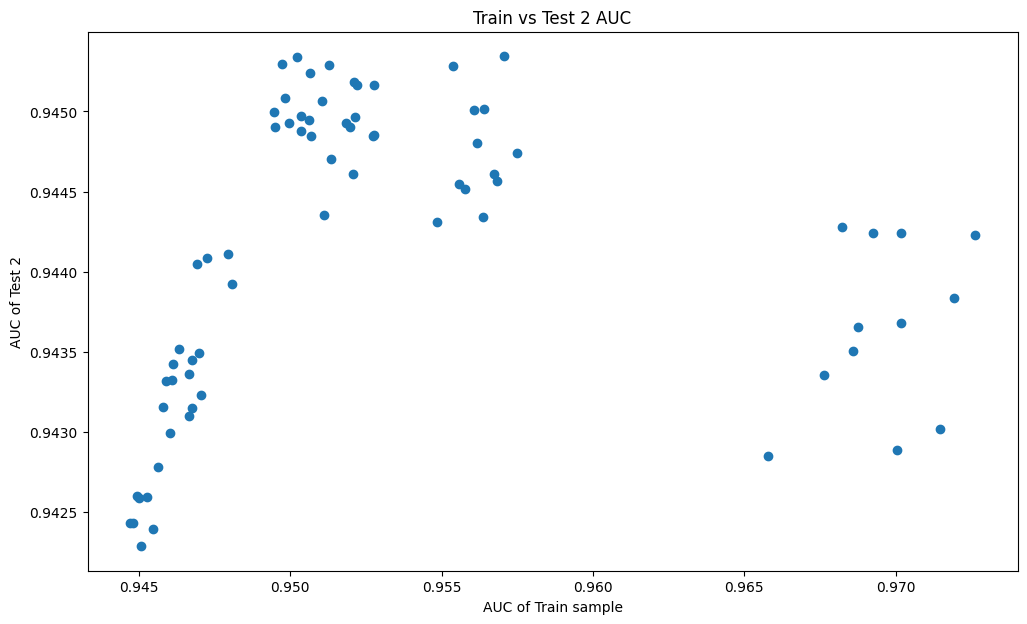

In [140]:
plt.figure(figsize=(12, 7))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 2'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 2'
title = 'Train vs Test 2 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


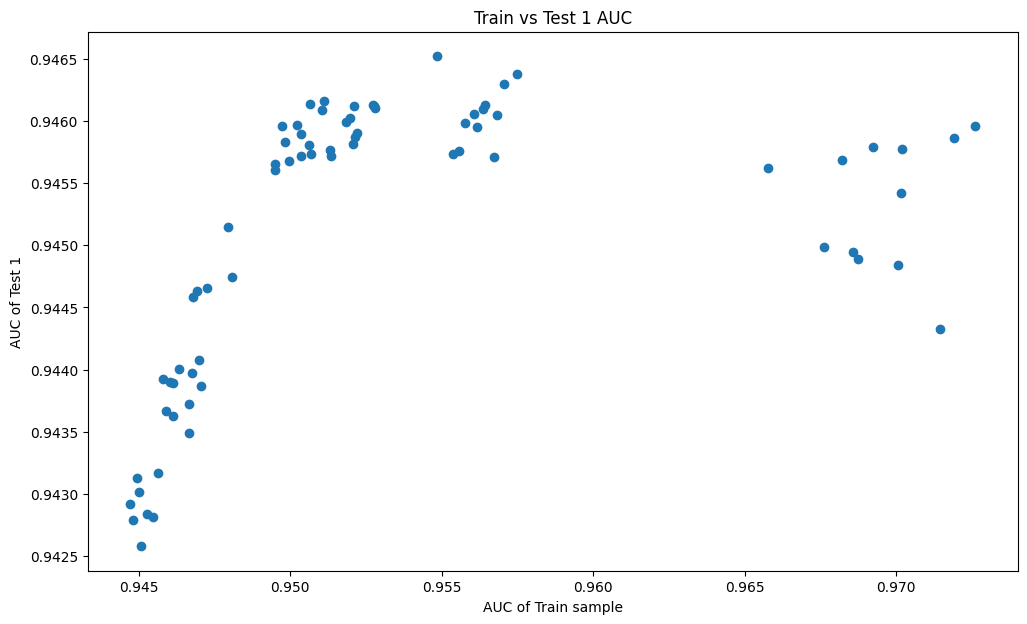

In [141]:
plt.figure(figsize=(12, 7))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 1'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 1'
title = 'Train vs Test 1 AUC'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


### Choose the best model, based on bias and variance ; Re-run the model with optimum parameters

In [142]:
# Find the row with the highest average AUC
best_model_xgb = results_df.loc[results_df['AUC AVG'].idxmax()]

best_model_params = {
    'n_estimators': best_model_xgb['# Trees'],
    'learning_rate': best_model_xgb['LR'],
    'subsample': float(best_model_xgb['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_xgb['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_xgb['% Weight of Default']
}

# Print information about the best model
print("Best Model Parameters:")
print(best_model_xgb)


Best Model Parameters:
# Trees                     300
LR                          0.1
Subsample %               80.0%
Features                 100.0%
% Weight of Default           1
AUC Train              0.972623
AUC Test 1             0.945961
AUC Test 2             0.944229
AUC AVG                0.954271
AUC SD                 0.012996
Name: 67, dtype: object


**Re-run the model with optimum parameters**

In [143]:
xgb_best_model = XGBClassifier(**best_model_params)
xgb_best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
xgb_best_model.save_model('xgb_best_model.json')

### ScoreBins

### Slide 9 - Define score bins based on the train sample, and apply the same thresholds to test samples. 
### Show rank orderings in a Bar-Chart, where each sample is one series in Bar Chart, X-Axis shows score bins (intervals), 
### and Y-Axis shows default rate in each bin.*

AUC on Train: 0.9726232775233253
AUC on Test 1: 0.9459608451709033
AUC on Test 2: 0.9442285414633108


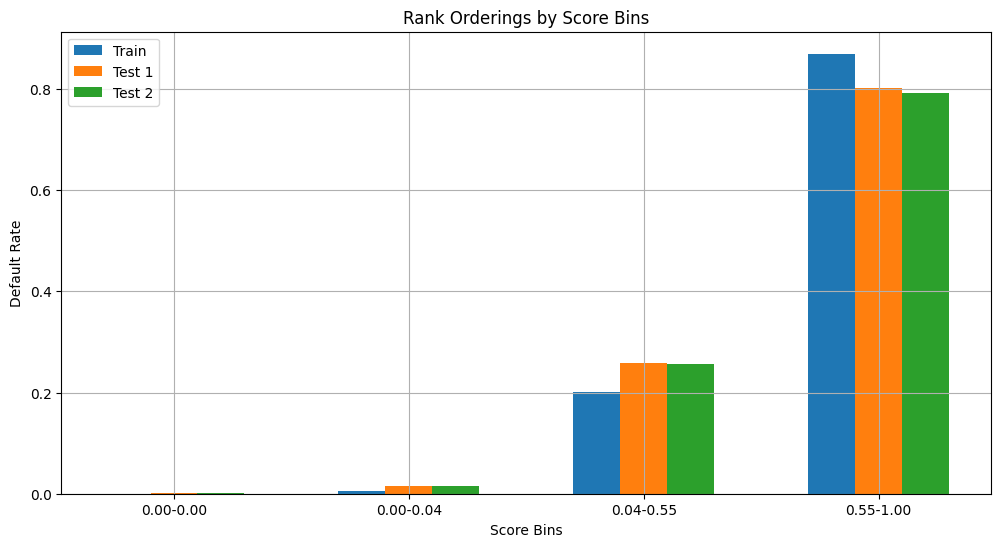

In [146]:
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC on each sample
auc_train = roc_auc_score(y_train, xgb_best_model.predict_proba(X_train)[:, 1])
auc_test1 = roc_auc_score(y_test1, xgb_best_model.predict_proba(X_test1)[:, 1])
auc_test2 = roc_auc_score(y_test2, xgb_best_model.predict_proba(X_test2)[:, 1])

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = xgb_best_model.predict_proba(X_train)[:, 1]
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Apply the same thresholds to test samples
test1_scores = xgb_best_model.predict_proba(X_test1)[:, 1]
test2_scores = xgb_best_model.predict_proba(X_test2)[:, 1]

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
   default_rates = []
   for i in range(len(bins) - 1):
       mask = (scores >= bins[i]) & (scores <= bins[i + 1])
       if np.sum(mask) > 0:
           default_rate = np.sum(y[mask]) / np.sum(mask)
           default_rates.append(default_rate)
       else:
           default_rates.append(0.0)
   return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)



# Create a figure for the bar chart
plt.figure(figsize=(12, 6))

# Plot the default rates for different samples in the respective score bins
width = 0.2
# Modify the x-axis labels to include the values of the score bins
x_labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

x_indexes = np.arange(len(x_labels))
# plt.bar(x_indexes - width, [s.values[0] for s in default_rates_train], width=width, label='Train', align='center')
# plt.bar(x_indexes,[s.values[0] for s in default_rates_test1] , width=width, label='Test 1', align='center')
# plt.bar(x_indexes + width,[s.values[0] for s in default_rates_test2]  , width=width, label='Test 2', align='center')

plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

# Set labels, title, and x-axis ticks
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, x_labels)  # Use modified x_labels

# Add a legend, grid, and display the plot
plt.legend()
plt.grid(True)
plt.show()



The score bins in the code are created based on percentiles of the scores from the training sample. The purpose of these bins is to divide the range of predicted scores into different groups to assess how well the model's predictions align with the likelihood of default or other outcomes.

**Slide 10. XGBoost – SHAP Analysis - Bee swarm graph**

In [147]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb_best_model)


In [148]:
shap_values = explainer(X_test1)

In [149]:
#D_* = Delinquency variables - minor crime
#S_* = Spend variables
#P_* = Payment variables
#B_* = Balance variables
#R_* = Risk variables

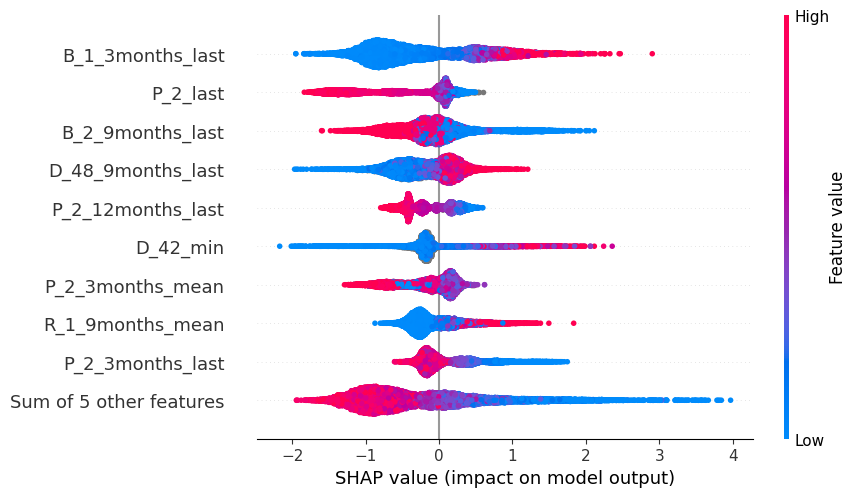

In [150]:
shap.plots.beeswarm(shap_values)

In [ ]:
'B_1_3months_last','P_2_last','B_2_9months_last','D_48_9months_last','P_2_12months_last'

In [151]:
#all are observation
#blue low value, red high value (value of feature itself not shap value)
#correlation bwn B_1_last and Y^ - shap positive - increaseing y hat, (here higher value has posiive correlation wit 

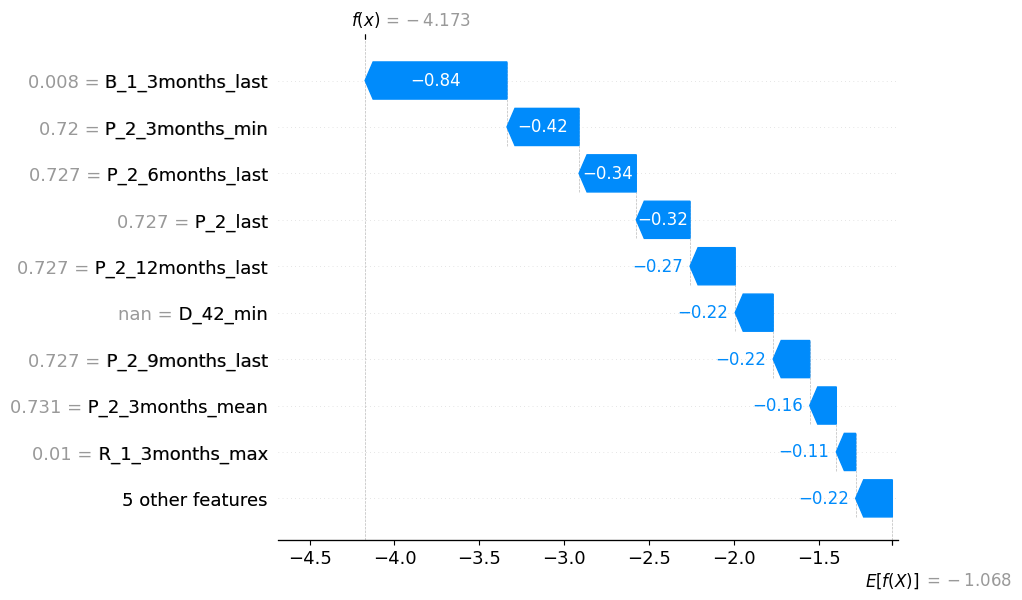

In [152]:
shap.plots.waterfall(shap_values[160])

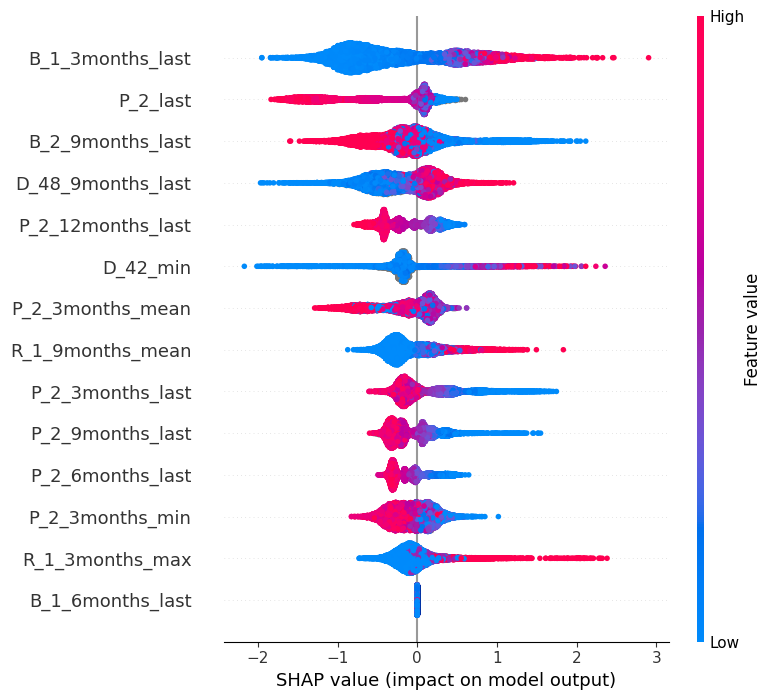

In [153]:
shap.summary_plot(shap_values)

## NEURAL NETWORK

In [154]:
cols=['R_1_3months_max', 'P_2_12months_last', 'R_3_mean', 'D_42_min',
       'D_48_6months_last', 'P_2_9months_last', 'P_2_3months_min',
       'B_2_9months_sum', 'P_2_last', 'P_2_3months_mean', 'B_1_last',
       'P_2_6months_last', 'B_1_6months_last', 'P_2_3months_last']

In [155]:
X = df3.drop(['customer_ID','target'], axis=1)
y = df3['target']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [157]:
# outlier

per_1 = X_train.quantile(0.01)
per_99 = X_train.quantile(0.99)

X_train = X_train[(X_train > per_1) & (X_train < per_99)]

In [158]:
# normalizaton

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)

In [159]:
# fill NAN to 0

X_train = X_train.fillna(0)

In [160]:
#Test
X_test1 = X_test1[(X_test1 > per_1) & (X_test1 < per_99)]
X_test2 = X_test2[(X_test2 > per_1) & (X_test2 < per_99)]

X_test1 = scaler.transform(X_test1)
X_test1 = pd.DataFrame(X_test1, columns = cols)

X_test2 = scaler.transform(X_test2)
X_test2 = pd.DataFrame(X_test2, columns = cols)

X_test1 = X_test1.fillna(0)
X_test2 = X_test2.fillna(0)

In [60]:
#!pip install tensorflow

In [161]:
import tensorflow as tf
results_df = pd.DataFrame(columns=['# HL', '# Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test1', 'AUC Test2'])

# Hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each combination of hyperparameters
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
                    for _ in range(n_layers):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Calculate ROC AUC scores for train, test1, and test2 sets
                    auc_train = roc_auc_score(y_train, model.predict(X_train))
                    auc_test1 = roc_auc_score(y_test1, model.predict(X_test1))
                    auc_test2 = roc_auc_score(y_test2, model.predict(X_test2))

                    # Create a DataFrame from the results
                    result_dict = {
                        '# HL': n_layers,
                        '# Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test1': auc_test1,
                        'AUC Test2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test1 AUC: {auc_test1}, Test2 AUC: {auc_test2}")

# Optionally, save the results to a CSV file after the entire grid search
results_df.to_csv('grid_search_results.csv', index=False)

441/441 [==============================] - 0s 535us/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9369640808330111, Test1 AUC: 0.9384358510210209, Test2 AUC: 0.9380881209789441
441/441 [==============================] - 0s 523us/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9232153200948809, Test1 AUC: 0.9242341107940105, Test2 AUC: 0.9233798866111304
441/441 [==============================] - 0s 538us/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9382968932685691, Test1 AUC: 0.9398749749163062, Test2 AUC: 0.9393204423280439
441/441 [==============================] - 0s 575us/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9187934342290653, Test1 AUC: 0.921815158672063, T

In [162]:
results_df

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test1,AUC Test2
0,2,4,relu,50%,100,0.936964,0.938436,0.938088
1,2,4,relu,50%,10000,0.923215,0.924234,0.923380
2,2,4,relu,0%,100,0.938297,0.939875,0.939320
3,2,4,relu,0%,10000,0.918793,0.921815,0.918011
4,2,4,tanh,50%,100,0.936672,0.938038,0.937885
5,2,4,tanh,50%,10000,0.918031,0.916497,0.917425
6,2,4,tanh,0%,100,0.938446,0.939745,0.939538
7,2,4,tanh,0%,10000,0.925133,0.926604,0.925714
8,2,6,relu,50%,100,0.934245,0.935118,0.935163
9,2,6,relu,50%,10000,0.917940,0.919461,0.918018


In [163]:
import numpy as np

In [164]:
AUC_AVG = (results_df['AUC Train'] + results_df['AUC Test1'] + results_df['AUC Test2']) / 3
AUC_SD = []
for i in range(32):
    AUC_SD.append(np.std([results_df['AUC Train'][i], results_df['AUC Test1'][i], results_df['AUC Test2'][i]]))
results_df['AUC AVG'] = AUC_AVG
results_df['AUC SD'] = AUC_SD


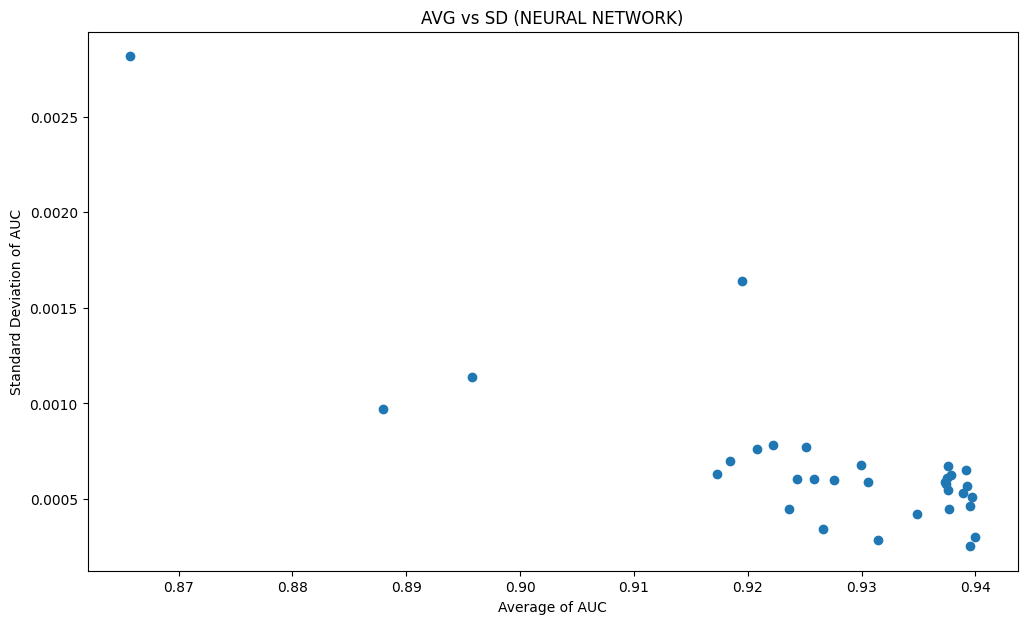

In [165]:
plt.figure(figsize=(12,7))
plt.scatter(results_df['AUC AVG'], results_df['AUC SD'])
xlab = 'Average of AUC'
ylab = 'Standard Deviation of AUC'
title = 'AVG vs SD (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


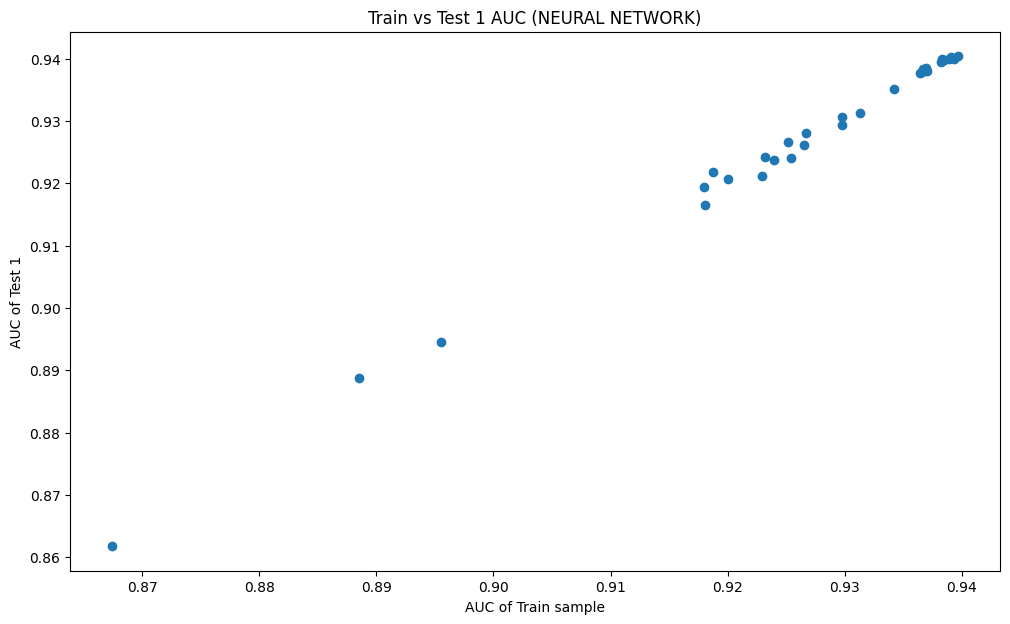

In [212]:
plt.figure(figsize=(12,7))
plt.scatter(results_df['AUC Train'], results_df['AUC Test1'])
xlab = 'AUC of Train sample'
ylab = 'AUC of Test 1'
title = 'Train vs Test 1 AUC (NEURAL NETWORK)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()


In [167]:
# Calculate the mean of AUC Test1 and AUC Test2
results_df['Mean AUC Test'] = (results_df['AUC Test1'] + results_df['AUC Test2']) / 2

# Find the row with the highest mean AUC Test score
best_model_nn = results_df.loc[results_df['Mean AUC Test'].idxmax()]

# Print the best model information
print("Best Model (based on Mean AUC Test):")
print(best_model_nn)

Best Model (based on Mean AUC Test):
# HL                          2
# Node                        6
Activation Function        relu
Dropout                      0%
Batch Size                  100
AUC Train              0.939667
AUC Test1              0.940394
AUC Test2              0.939906
AUC AVG                0.939989
AUC SD                 0.000303
Mean AUC Test           0.94015
Name: 10, dtype: object


In [168]:
# hyperparameters of the best model
best_n_layers = int(best_model_nn['# HL'])
best_n_nodes = int(best_model_nn['# Node'])
best_activation = best_model_nn['Activation Function']
best_dropout = float(best_model_nn['Dropout'].strip('%')) / 100.0
best_batch_size = int(best_model_nn['Batch Size'])

**re-run the model with optimum parameters**

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# best model with optimum parameters
nn_best_model = Sequential()
nn_best_model.add(Dense(best_n_nodes, activation=best_activation, input_shape=(X_train.shape[1],)))
for _ in range(best_n_layers - 1):
    nn_best_model.add(Dense(best_n_nodes, activation=best_activation))
    if best_dropout < 1.0:
        nn_best_model.add(Dropout(best_dropout))
nn_best_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
nn_best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the best model on the entire training set
nn_best_model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)

nn_best_model.save('nn_best_model.keras')

Epoch 1/20
658/658 [==============================] - 1s 1ms/step - loss: 0.3639 - auc: 0.8993
Epoch 2/20
658/658 [==============================] - 1s 865us/step - loss: 0.2823 - auc: 0.9360
Epoch 3/20
658/658 [==============================] - 1s 821us/step - loss: 0.2808 - auc: 0.9366
Epoch 4/20
658/658 [==============================] - 1s 990us/step - loss: 0.2798 - auc: 0.9371
Epoch 5/20
658/658 [==============================] - 1s 950us/step - loss: 0.2790 - auc: 0.9375
Epoch 6/20
658/658 [==============================] - 1s 818us/step - loss: 0.2785 - auc: 0.9377
Epoch 7/20
658/658 [==============================] - 1s 825us/step - loss: 0.2782 - auc: 0.9379
Epoch 8/20
658/658 [==============================] - 1s 806us/step - loss: 0.2778 - auc: 0.9381
Epoch 9/20
658/658 [==============================] - 1s 840us/step - loss: 0.2778 - auc: 0.9381
Epoch 10/20
658/658 [==============================] - 1s 809us/step - loss: 0.2774 - auc: 0.9382
Epoch 11/20
658/658 [==========

441/441 [==============================] - 0s 565us/step
AUC on Train: 0.9391531931064504
AUC on Test 1: 0.9409057557812563
AUC on Test 2: 0.9402697794291932


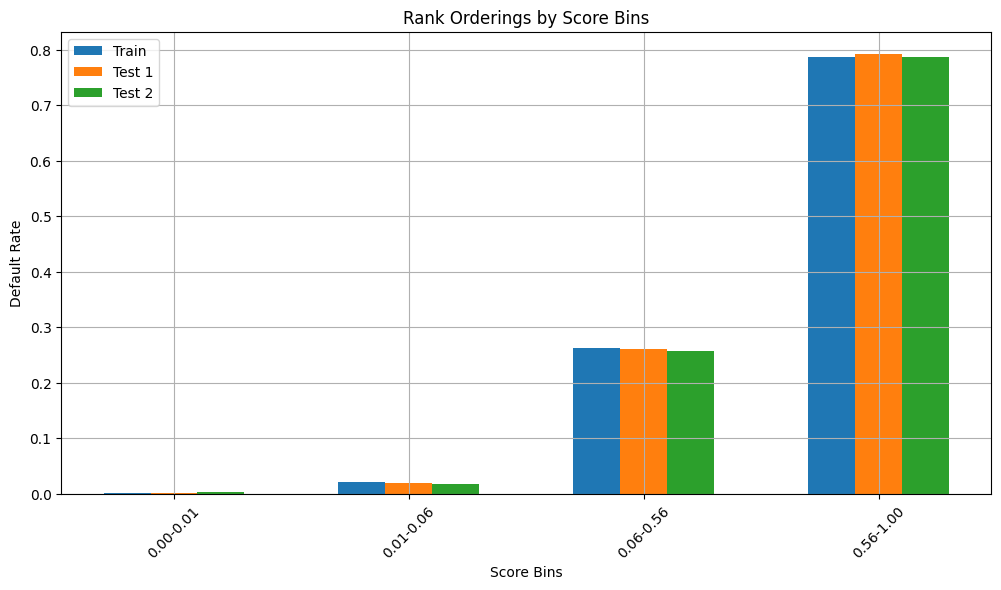

In [170]:

# Calculate AUC on each sample
y_train_pred = nn_best_model.predict(X_train)
y_test1_pred = nn_best_model.predict(X_test1)
y_test2_pred = nn_best_model.predict(X_test2)

auc_train = roc_auc_score(y_train, y_train_pred)
auc_test1 = roc_auc_score(y_test1, y_test1_pred)
auc_test2 = roc_auc_score(y_test2, y_test2_pred)

print(f"AUC on Train: {auc_train}")
print(f"AUC on Test 1: {auc_test1}")
print(f"AUC on Test 2: {auc_test2}")

# Define score bins based on the train sample
train_scores = y_train_pred.reshape(-1)
bins = np.percentile(train_scores, [0, 25, 50, 75, 100])

# Calculate the value ranges for each bin
bin_ranges = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins) - 1)]

# Apply the same thresholds to test samples
test1_scores = y_test1_pred.reshape(-1)
test2_scores = y_test2_pred.reshape(-1)

# Calculate default rates in each bin for each sample
def calculate_default_rate(scores, y):
    default_rates = []
    for i in range(len(bins) - 1):
        mask = (scores >= bins[i]) & (scores <= bins[i + 1])
        if np.sum(mask) > 0:
            default_rate = np.sum(y[mask]) / np.sum(mask)
            default_rates.append(default_rate)
        else:
            default_rates.append(0.0)
    return default_rates

default_rates_train = calculate_default_rate(train_scores, y_train)
default_rates_test1 = calculate_default_rate(test1_scores, y_test1)
default_rates_test2 = calculate_default_rate(test2_scores, y_test2)

x_indexes = np.arange(len(bin_ranges))

plt.figure(figsize=(12, 6))

width = 0.2
# plt.bar(x_indexes - width, [s.values[0] for s in default_rates_train], width=width, label='Train', align='center')
# plt.bar(x_indexes,[s.values[0] for s in default_rates_test1] , width=width, label='Test 1', align='center')
# plt.bar(x_indexes + width,[s.values[0] for s in default_rates_test2]  , width=width, label='Test 2', align='center')


plt.bar(x_indexes - width, default_rates_train, width=width, label='Train', align='center')
plt.bar(x_indexes, default_rates_test1, width=width, label='Test 1', align='center')
plt.bar(x_indexes + width, default_rates_test2, width=width, label='Test 2', align='center')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Rank Orderings by Score Bins')
plt.xticks(x_indexes, bin_ranges, rotation=45)  # Display bin ranges on the x-axis
plt.legend()
plt.grid(True)
plt.show()

In [171]:
best_model_xgb

# Trees                     300
LR                          0.1
Subsample %               80.0%
Features                 100.0%
% Weight of Default           1
AUC Train              0.972623
AUC Test 1             0.945961
AUC Test 2             0.944229
AUC AVG                0.954271
AUC SD                 0.012996
Name: 67, dtype: object

In [172]:
best_model_nn

# HL                          2
# Node                        6
Activation Function        relu
Dropout                      0%
Batch Size                  100
AUC Train              0.939667
AUC Test1              0.940394
AUC Test2              0.939906
AUC AVG                0.939989
AUC SD                 0.000303
Mean AUC Test           0.94015
Name: 10, dtype: object

**overall XGBoost performed better on test than Neural network**

In [173]:
# AUC scores from best_model_row
auc_test1_xgb = 0.945775
auc_test2_xgb = 0.943285

# average AUC score for best_model_row
avg_auc_xgb = (auc_test1_xgb + auc_test2_xgb) / 2
print("Avg AUC value of XGB Model :",avg_auc_xgb)

# AUC scores from best_model_select
auc_test1_nn = best_model_nn['AUC Test1']
auc_test2_nn = best_model_nn['AUC Test2']

# average AUC score for best_model_select
avg_auc_nn = (auc_test1_nn + auc_test2_nn) / 2
print("Avg AUC value of NN Model :",avg_auc_nn)

# Determine the best model and label the AUC values
if avg_auc_xgb > avg_auc_nn:
    best_model = "XGB Model"  # XGBoost model is better
    best_avg_auc = avg_auc_xgb
    model_label = "Avg AUC value of "
else:
    best_model = "NN Model"  # Neural Network model is better
    best_avg_auc = avg_auc_nn
    model_label = "Avg AUC value of "


print(f"The best model is {best_model} with {model_label}: {best_avg_auc:.5f}")

Avg AUC value of XGB Model : 0.9445300000000001
Avg AUC value of NN Model : 0.940150198740384
The best model is XGB Model with Avg AUC value of : 0.94453


In [185]:
X = df3.drop(['customer_ID','target'], axis=1)
y = df3['target']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [187]:
# Get predictions for the train dataset
xgb_predictions_train = xgb_best_model.predict(X_train)

# Get predictions for the test1 dataset
xgb_predictions_test1 = xgb_best_model.predict(X_test1)

# Get predictions for the test2 dataset
xgb_predictions_test2 = xgb_best_model.predict(X_test2)

# Get predicted probabilities for the train dataset
xgb_probs_train = xgb_best_model.predict_proba(X_train)

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = xgb_best_model.predict_proba(X_test1)

# Get predicted probabilities for the test2 dataset
xgb_probs_test2 = xgb_best_model.predict_proba(X_test2)


## Strategy

In [188]:
data.head()

,customer_ID,target,date,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-03-23,0.310200,0.008095,0.517567,0.116688,0.004788,0.170171,0.000903,...,1,0,0,0,0,0,1,0,0,0
1,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-04-03,0.288228,0.362597,0.305423,0.116505,0.003811,0.148202,0.009072,...,1,0,0,0,0,0,1,0,0,0
2,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-05-23,0.282362,0.030221,0.483003,0.057409,0.000753,0.148253,0.001561,...,1,0,0,0,0,0,1,0,0,0
3,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-06-22,0.279579,0.030232,0.425258,0.056684,0.003331,0.154602,0.001127,...,1,0,0,0,0,0,1,0,0,0
4,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-07-22,0.287119,0.034164,0.341967,0.080234,0.000953,0.157003,0.001779,...,1,0,0,0,0,0,1,0,0,0


In [189]:
q1_tst=data[['date','S_3','B_41']]

In [190]:
q1_tst

,date,S_3,B_41
0,2017-03-23,0.170171,0.003377
1,2017-04-03,0.148202,0.001965
2,2017-05-23,0.148253,0.008949
3,2017-06-22,0.154602,0.003754
4,2017-07-22,0.157003,0.002349
...,...,...,...
1105619,2017-11-25,0.588169,0.005201
1105620,2017-12-26,0.585170,0.003821
1105621,2018-01-26,0.590213,0.003773
1105622,2018-02-23,0.583824,0.009312


In [ ]:
#### # Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_train = []
portfolio_revenues_train = []
applicant_counts_train = []

# Choose your desired spend and balance features for the training data
spend_feature_train = q1_tst['S_3']
balance_feature_train = q1_tst['B_41']

# Get the date feature "S_2" from df3
date_feature_train = data['date']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the training data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_train = q1_tst[(pd.to_datetime(date_feature_train) >= start_date) & (pd.to_datetime(date_feature_train) <= end_date)]
average_spend_train = np.mean(filtered_data_train['S_3'])
average_balance_train = np.mean(filtered_data_train['B_41'])

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_train = average_balance_train * 0.02 + average_spend_train * 0.001

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_train = monthly_revenue_train * 12


# Iterate through the thresholds for the training data
for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_train = xgb_probs_train[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the training data
    total_applicants_train = len(accepted_indices_train)

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_train = np.sum(y_train[accepted_indices_train])

    # Calculate the default rate among all applicants for the training data
    default_rate_train = defaulted_applicants_train / total_applicants_train

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)

    # Append results to the lists for the training data
    default_rates_train.append(default_rate_train)
    portfolio_revenues_train.append(portfolio_revenue_value_train)
    applicant_counts_train.append(total_applicants_train)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Training Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_train[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_train[i]:.2f}, Number of Applicants: {applicant_counts_train[i]}")


In [193]:
import numpy as np
import pandas as pd

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test_1 data
default_rates_test1 = []
portfolio_revenues_test1 = []
applicant_counts_test1 = []

# Choose your desired spend and balance features for the test_1 data
spend_feature_test1 = q1_tst['S_3']
balance_feature_test1 = q1_tst['B_41']

# Get the date feature "S_2" from df3
date_feature_test1 = data['date']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the test_1 data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test1 = q1_tst[(date_feature_test1 >= start_date) & (date_feature_test1 <= end_date)]
average_spend_test1 = np.mean(filtered_data_test1['S_3'])
average_balance_test1 = np.mean(filtered_data_test1['B_41'])

# Calculate the monthly revenue for 1 customer for the test_1 data
monthly_revenue_test1 = average_balance_test1 * 0.02 + average_spend_test1 * 0.001

# Calculate the expected annual revenue for the test_1 data over the next 12 months
expected_revenue_test1 = monthly_revenue_test1 * 12

# Iterate through the thresholds for the test_1 data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test_1 data
    accepted_indices_test1 = xgb_probs_test1[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test_1 data
    total_applicants_test1 = len(accepted_indices_test1)

    # Calculate the number of applicants who defaulted for the test_1 data
    defaulted_applicants_test1 = np.sum(y_test1[accepted_indices_test1])

    # Calculate the default rate among all applicants for the test_1 data
    default_rate_test1 = defaulted_applicants_test1 / total_applicants_test1

    # Calculate the portfolio revenue for the test_1 data
    portfolio_revenue_value_test1 = np.sum(expected_revenue_test1 * accepted_indices_test1)

    # Append results to the lists for the test_1 data
    default_rates_test1.append(default_rate_test1)
    portfolio_revenues_test1.append(portfolio_revenue_value_test1)
    applicant_counts_test1.append(total_applicants_test1)

# Print the results for each threshold for the test_1 data
for i, threshold in enumerate(thresholds):
    print(f"Test_1 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test1[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test1[i]:.2f}, Number of Applicants: {applicant_counts_test1[i]}")


Test_1 Data - Threshold: 0.1, Default Rate: 0.93%, Portfolio Revenue: $93.88, Number of Applicants: 14099
Test_1 Data - Threshold: 0.2, Default Rate: 1.90%, Portfolio Revenue: $104.06, Number of Applicants: 14099
Test_1 Data - Threshold: 0.3, Default Rate: 3.03%, Portfolio Revenue: $110.68, Number of Applicants: 14099
Test_1 Data - Threshold: 0.4, Default Rate: 4.49%, Portfolio Revenue: $117.51, Number of Applicants: 14099
Test_1 Data - Threshold: 0.5, Default Rate: 6.09%, Portfolio Revenue: $123.69, Number of Applicants: 14099
Test_1 Data - Threshold: 0.6, Default Rate: 8.14%, Portfolio Revenue: $130.32, Number of Applicants: 14099
Test_1 Data - Threshold: 0.7, Default Rate: 11.10%, Portfolio Revenue: $138.04, Number of Applicants: 14099
Test_1 Data - Threshold: 0.8, Default Rate: 14.45%, Portfolio Revenue: $145.89, Number of Applicants: 14099
Test_1 Data - Threshold: 0.9, Default Rate: 18.58%, Portfolio Revenue: $154.26, Number of Applicants: 14099
Test_1 Data - Threshold: 1.0, Defau

In [195]:
import numpy as np
import pandas as pd

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test_2 data
default_rates_test2 = []
portfolio_revenues_test2 = []
applicant_counts_test2 = []

# Choose your desired spend and balance features for the test_2 data
spend_feature_test2 = q1_tst['S_3']
balance_feature_test2 = q1_tst['B_41']

# Get the date feature "S_2" from df3
date_feature_test2 = data['date']

# Calculate the average spend and balance for the last 6 months (November 2017 to April 2018) for the test_2 data
start_date = pd.to_datetime("2017-11-01")
end_date = pd.to_datetime("2018-04-30")
filtered_data_test2 = q1_tst[(date_feature_test2 >= start_date) & (date_feature_test2 <= end_date)]
average_spend_test2 = np.mean(filtered_data_test2['S_3'])
average_balance_test2 = np.mean(filtered_data_test2['B_41'])

# Calculate the monthly revenue for 1 customer for the test_2 data
monthly_revenue_test2 = average_balance_test2 * 0.02 + average_spend_test2 * 0.001

# Calculate the expected annual revenue for the test_2 data over the next 12 months
expected_revenue_test2 = monthly_revenue_test2 * 12

# Iterate through the thresholds for the test_2 data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test_2 data
    accepted_indices_test2 = xgb_probs_test2[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test_2 data
    total_applicants_test2 = len(accepted_indices_test2)

    # Calculate the number of applicants who defaulted for the test_2 data
    defaulted_applicants_test2 = np.sum(y_test2[accepted_indices_test2])

    # Calculate the default rate among all applicants for the test_2 data
    default_rate_test2 = defaulted_applicants_test2 / total_applicants_test2

    # Calculate the portfolio revenue for the test_2 data
    portfolio_revenue_value_test2 = np.sum(expected_revenue_test2 * accepted_indices_test2)

    # Append results to the lists for the test_2 data
    default_rates_test2.append(default_rate_test2)
    portfolio_revenues_test2.append(portfolio_revenue_value_test2)
    applicant_counts_test2.append(total_applicants_test2)

# Print the results for each threshold for the test_2 data
for i, threshold in enumerate(thresholds):
    print(f"Test_2 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test2[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test2[i]:.2f}, Number of Applicants: {applicant_counts_test2[i]}")


Test_2 Data - Threshold: 0.1, Default Rate: 0.88%, Portfolio Revenue: $94.64, Number of Applicants: 14099
Test_2 Data - Threshold: 0.2, Default Rate: 1.77%, Portfolio Revenue: $103.98, Number of Applicants: 14099
Test_2 Data - Threshold: 0.3, Default Rate: 2.78%, Portfolio Revenue: $110.76, Number of Applicants: 14099
Test_2 Data - Threshold: 0.4, Default Rate: 4.09%, Portfolio Revenue: $117.19, Number of Applicants: 14099
Test_2 Data - Threshold: 0.5, Default Rate: 5.87%, Portfolio Revenue: $124.02, Number of Applicants: 14099
Test_2 Data - Threshold: 0.6, Default Rate: 8.01%, Portfolio Revenue: $130.41, Number of Applicants: 14099
Test_2 Data - Threshold: 0.7, Default Rate: 10.79%, Portfolio Revenue: $137.98, Number of Applicants: 14099
Test_2 Data - Threshold: 0.8, Default Rate: 14.24%, Portfolio Revenue: $146.07, Number of Applicants: 14099
Test_2 Data - Threshold: 0.9, Default Rate: 18.60%, Portfolio Revenue: $155.21, Number of Applicants: 14099
Test_2 Data - Threshold: 1.0, Defau

In [ ]:
#SHAP
#we can interprete the ensemble models


    x1   x2      x3   Y^
X1  5.2  -2.3   4.6    (sum of shap values for regression, for classificaiton sigmoid(sum(shap)))
X2  2.3  -5     0.5



In [ ]:
if someone comes and says rejected for credit card then we do shap analysis,

like here for x1 is credit score, x2 is beauru enquiry etc
x1 and x3 is high so you were rejected bcos X1 and X3 is high



#avg